<a href="https://colab.research.google.com/github/dtermite/PythonColab/blob/main/Capitulo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Creando nombres

In [1]:
import pandas as pd

In [2]:
nombres_m = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?sexo=M&qtd=200')
nombres_f = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?sexo=F&qtd=200')

In [3]:
print("Cantidad de nombres: " + str(len(nombres_m)+len(nombres_f)))

Cantidad de nombres: 400


In [4]:
frames = [nombres_m, nombres_f]
frames

[          nome  regiao     freq  rank sexo
 0         JOSE       0  5732508     1    M
 1         JOAO       0  2971935     2    M
 2      ANTONIO       0  2567494     3    M
 3    FRANCISCO       0  1765197     4    M
 4       CARLOS       0  1483121     5    M
 ..         ...     ...      ...   ...  ...
 195     WALTER       0    67207   196    M
 196    ARLINDO       0    66669   197    M
 197    MICHAEL       0    65736   198    M
 198     ALVARO       0    65444   199    M
 199    GEOVANE       0    65435   200    M
 
 [200 rows x 5 columns],
           nome  regiao      freq  rank sexo
 0        MARIA       0  11694738     1    F
 1          ANA       0   3079729     2    F
 2    FRANCISCA       0    721637     3    F
 3      ANTONIA       0    588783     4    F
 4      ADRIANA       0    565621     5    F
 ..         ...     ...       ...   ...  ...
 195     ROSANE       0     82203   196    F
 196    IVONETE       0     81878   197    F
 197    LUCIANE       0     81230   198 

In [5]:
nombres = pd.concat(frames)['nome'].to_frame()
nombres.columns = ['nombre']
nombres.sample(5)

,nombre
39,ROSA
59,MANUEL
158,EDIVALDO
58,ALESSANDRA
48,RENATO


#Incluyendo id de alumnos|

In [6]:
nombres.sample(5)

,nombre
31,JOSEFA
143,MAIARA
80,TAIS
1,ANA
43,TEREZINHA


In [7]:
import numpy as np

In [8]:
#Creo numeros aleatorios con numpy para agregar el id a los registos del dataframe
np.random.seed(123)

In [9]:
total_alumnos = len(nombres)
total_alumnos

400

In [10]:
#creo los id y se los agrego al dataframe
nombres['id_alumno'] = np.random.permutation(total_alumnos) + 1
nombres.sample(5)

,nombre,id_alumno
188,VALDECIR,369
57,IGOR,303
3,ANTONIA,382
182,LIDIANE,33
30,ELIANE,111


In [11]:
#Creo una lista de dominios
dominios = ['@dominiodeemail.com', '@serviciodeemail.com']

In [12]:
#Agrego aleatoriemente dominios a los alumnos
nombres['dominio'] = np.random.choice(dominios, total_alumnos)
nombres.sample(5)

,nombre,id_alumno,dominio
84,FATIMA,78,@dominiodeemail.com
0,MARIA,331,@serviciodeemail.com
179,LILIANE,340,@dominiodeemail.com
10,LUIS,174,@dominiodeemail.com
171,VALDEMIR,45,@dominiodeemail.com


In [13]:
#Creo el campo email y armo al direccion de email con el nombre y dominio
nombres['email'] =nombres.nombre.str.cat(nombres.dominio).str.lower()
nombres.sample(5)

,nombre,id_alumno,dominio,email
114,ELZA,320,@dominiodeemail.com,elza@dominiodeemail.com
57,IGOR,303,@serviciodeemail.com,igor@serviciodeemail.com
85,FABRICIO,221,@dominiodeemail.com,fabricio@dominiodeemail.com
183,MARLON,8,@dominiodeemail.com,marlon@dominiodeemail.com
189,WESLEI,137,@dominiodeemail.com,weslei@dominiodeemail.com


#Creando Cursos

In [14]:
import html5lib

In [15]:
url = 'http://dsinformatica.dyndns.org/cursos/'

In [16]:
cursos =pd.read_html(url)
cursos

[                 Curso
 0  Introduccion a HTML
 1          Bootstrap 4
 2   JavaScript bÃ¡sico
 3        Java para web
 4          C# para Web
 5     Cursos de Python
 6         Curso de PHP
 7       Curso de React
 8     Curso de Node.JS]

In [17]:
#Al leer de una url lo levanta como una lista, para convertirlo en dataframe se invoca llamndo al primer elemento y se almacena en el mimso dataframe
cursos = cursos[0]
cursos

,Curso
0,Introduccion a HTML
1,Bootstrap 4
2,JavaScript bÃ¡sico
3,Java para web
4,C# para Web
5,Cursos de Python
6,Curso de PHP
7,Curso de React
8,Curso de Node.JS


In [18]:
cursos.head()

,Curso
0,Introduccion a HTML
1,Bootstrap 4
2,JavaScript bÃ¡sico
3,Java para web
4,C# para Web


#Adicionando Index

In [19]:
cursos.rename(columns={'Curso' : 'nombre_curso'})

,nombre_curso
0,Introduccion a HTML
1,Bootstrap 4
2,JavaScript bÃ¡sico
3,Java para web
4,C# para Web
5,Cursos de Python
6,Curso de PHP
7,Curso de React
8,Curso de Node.JS


In [20]:
#renombro columna y la aplico al dataframe
cursos = cursos.rename(columns={'Curso' : 'nombre_curso'})

In [21]:
cursos

,nombre_curso
0,Introduccion a HTML
1,Bootstrap 4
2,JavaScript bÃ¡sico
3,Java para web
4,C# para Web
5,Cursos de Python
6,Curso de PHP
7,Curso de React
8,Curso de Node.JS


In [22]:
#Agregando un indice a dataframe
cursos['id']= cursos.index + 1
cursos

,nombre_curso,id
0,Introduccion a HTML,1
1,Bootstrap 4,2
2,JavaScript bÃ¡sico,3
3,Java para web,4
4,C# para Web,5
5,Cursos de Python,6
6,Curso de PHP,7
7,Curso de React,8
8,Curso de Node.JS,9


In [23]:
#reemplazo el index con mi columna id
cursos = cursos.set_index('id')
cursos

,nombre_curso
id,
1,Introduccion a HTML
2,Bootstrap 4
3,JavaScript bÃ¡sico
4,Java para web
5,C# para Web
6,Cursos de Python
7,Curso de PHP
8,Curso de React
9,Curso de Node.JS


In [24]:
cursos.shape

(9, 1)

#Matriculando alumnos

In [25]:
nombres['matriculas'] = np.ceil(np.random.exponential(size=total_alumnos)*1.5).astype(int)
nombres.head()

,nombre,id_alumno,dominio,email,matriculas
0,JOSE,235,@dominiodeemail.com,jose@dominiodeemail.com,1
1,JOAO,43,@serviciodeemail.com,joao@serviciodeemail.com,1
2,ANTONIO,304,@serviciodeemail.com,antonio@serviciodeemail.com,5
3,FRANCISCO,156,@dominiodeemail.com,francisco@dominiodeemail.com,5
4,CARLOS,343,@serviciodeemail.com,carlos@serviciodeemail.com,1


In [26]:
nombres.matriculas.describe()

count    400.000000
mean       2.135000
std        1.515757
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       12.000000
Name: matriculas, dtype: float64

In [27]:
import seaborn as sns

<ipython-input-28-68059771b3aa>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(nombres.matriculas)


<Axes: xlabel='matriculas', ylabel='Density'>

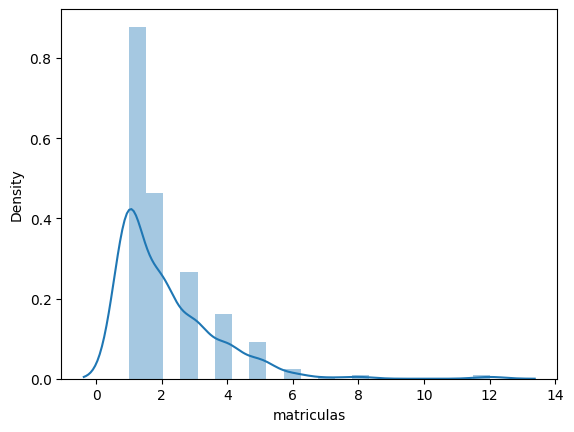

In [28]:
sns.distplot(nombres.matriculas)

In [29]:
nombres.matriculas.value_counts()

1     184
2      97
3      56
4      34
5      19
6       5
12      2
8       2
7       1
Name: matriculas, dtype: int64

#Seleccionando Alumnos

In [30]:
nombres.head()

,nombre,id_alumno,dominio,email,matriculas
0,JOSE,235,@dominiodeemail.com,jose@dominiodeemail.com,1
1,JOAO,43,@serviciodeemail.com,joao@serviciodeemail.com,1
2,ANTONIO,304,@serviciodeemail.com,antonio@serviciodeemail.com,5
3,FRANCISCO,156,@dominiodeemail.com,francisco@dominiodeemail.com,5
4,CARLOS,343,@serviciodeemail.com,carlos@serviciodeemail.com,1


In [31]:
cursos

,nombre_curso
id,
1,Introduccion a HTML
2,Bootstrap 4
3,JavaScript bÃ¡sico
4,Java para web
5,C# para Web
6,Cursos de Python
7,Curso de PHP
8,Curso de React
9,Curso de Node.JS


In [32]:
todas_matriculas = []
x = np.random.rand(len(cursos))
prob = x / sum(x)
prob

array([2.57370998e-01, 3.90402384e-02, 1.30203045e-01, 6.49005977e-02,
       2.34540225e-01, 1.27522899e-01, 4.27078183e-05, 8.25094425e-02,
       6.38698466e-02])

In [33]:
#Elejir aleatoreamente los cursos y asignarselo a los alumnos
for index, row in nombres.iterrows():
  id = row.id_alumno
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)

matriculas=pd.DataFrame(todas_matriculas, columns=['id_alumno', 'id_curso'])
matriculas.head()

,id_alumno,id_curso
0,235,1
1,43,5
2,304,3
3,304,1
4,304,9


In [34]:
matriculas_por_curso =matriculas.groupby('id_curso').count().join(cursos['nombre_curso'])[['nombre_curso', 'id_alumno']].rename(columns={'id_alumno':'Total'}).sort_values('Total', ascending = False)
matriculas_por_curso

,nombre_curso,Total
id_curso,,
1,Introduccion a HTML,240
5,C# para Web,203
6,Cursos de Python,109
3,JavaScript bÃ¡sico,100
8,Curso de React,68
4,Java para web,49
9,Curso de Node.JS,46
2,Bootstrap 4,38
7,Curso de PHP,1


In [35]:
prob

array([2.57370998e-01, 3.90402384e-02, 1.30203045e-01, 6.49005977e-02,
       2.34540225e-01, 1.27522899e-01, 4.27078183e-05, 8.25094425e-02,
       6.38698466e-02])

#Salida en diferentes formatos

In [36]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index = False)

In [37]:
matriculas_por_curso.to_json('matriculas_por_curso.json')

In [38]:
matriculas_por_curso.to_html('matriculas_por_curso.html', index = False)

#Creando Banco SQL

In [39]:
#Importo las librerias para trabajar con base de datos
from sqlalchemy import create_engine, MetaData, Table, inspect, text

In [40]:
matriculas_por_curso.head(5)

,nombre_curso,Total
id_curso,,
1,Introduccion a HTML,240
5,C# para Web,203
6,Cursos de Python,109
3,JavaScript bÃ¡sico,100
8,Curso de React,68


In [41]:
#Creo el motor de busqueda. Python trabaja con cualquier base de datos, colob tiene su propia en el nube que va a estar activa en memoria, muentra este en uso
engine = create_engine('sqlite:///: memory:')
engine

Engine(sqlite:///: memory:)

In [42]:
#Exportar el Dataframe a SQL, se graba en una base con nombre "matriculas"
matriculas_por_curso.to_sql('matriculas', engine)

9

In [43]:
insp = inspect(engine)
print(insp.get_table_names())

['matriculas']


#Buscando en Banco SQL

In [47]:
#armo la consulta previamente
query = 'select * from matriculas where Total < 50'

In [48]:
#Busco en el total de la tabla de acuerdo a la consulta armada previamente
pd.read_sql(sql=text(query), con=engine.connect())

,id_curso,nombre_curso,Total
0,4,Java para web,49
1,9,Curso de Node.JS,46
2,2,Bootstrap 4,38
3,7,Curso de PHP,1


In [50]:
#consulto a la tabal completa, seleccionndo solo algunas columnas
pd.read_sql_table('matriculas', con=engine.connect(), columns=['nombre_curso', 'Total'])

,nombre_curso,Total
0,Introduccion a HTML,240
1,C# para Web,203
2,Cursos de Python,109
3,JavaScript bÃ¡sico,100
4,Curso de React,68
5,Java para web,49
6,Curso de Node.JS,46
7,Bootstrap 4,38
8,Curso de PHP,1


In [51]:
#Guardo la consulta en una variable
muchas_matriculas=pd.read_sql_table('matriculas', con=engine.connect(), columns=['nombre_curso', 'Total'])
muchas_matriculas

,nombre_curso,Total
0,Introduccion a HTML,240
1,C# para Web,203
2,Cursos de Python,109
3,JavaScript bÃ¡sico,100
4,Curso de React,68
5,Java para web,49
6,Curso de Node.JS,46
7,Bootstrap 4,38
8,Curso de PHP,1


In [53]:
#una vez creado un DF puedo usar metodos propios, y sobreescribo en el mismo DF
muchas_matriculas=muchas_matriculas.query('Total>80')

#Escribiendo en el banco SQL

In [54]:
#Envio el nuevo DF a una nueva tabla
muchas_matriculas.to_sql('muchas_matriculas', engine)

4

In [60]:
#Consulto tablas dentro de la BD
print(inspect(engine).get_table_names())

['matriculas', 'muchas_matriculas']


#Nombres para el ingreso

In [61]:
matriculas.sample(5)

,id_alumno,id_curso
566,283,1
191,7,1
520,318,6
769,362,1
242,300,1


In [63]:
id_curso = 6
proxima_clase=matriculas.query('id_curso == {}'.format(id_curso))
proxima_clase

,id_alumno,id_curso
9,156,6
29,217,6
35,185,6
38,347,6
39,347,6
...,...,...
839,18,6
842,99,6
843,99,6
846,323,6


In [68]:
#Relaciono 2 DF por su indice y lo convierto a DF
proxima_clase.set_index('id_alumno').join(nombres.set_index('id_alumno'))['nombre'].to_frame()

,nombre
id_alumno,
5,JOSUE
10,RODRIGO
12,GUSTAVO
18,CLARA
22,IVAN
...,...
391,RENATO
392,MARLI
396,ROBSON


In [73]:
nombre_aula = cursos.loc[id_curso]
nombre_aula

nombre_curso    Cursos de Python
Name: 6, dtype: object

In [74]:
nombre_aula = nombre_aula.nombre_curso
nombre_aula

'Cursos de Python'

In [75]:
proxima_clase = proxima_clase.set_index('id_alumno').join(nombres.set_index('id_alumno'))['nombre'].to_frame()

In [76]:
#vuelvo a armar la relacion y cambio el nombre de la columns
proxima_clase = proxima_clase.rename(columns={'nombre': 'Alumnos del curso de {}'.format(nombre_aula)})
proxima_clase.sample(5)

,Alumnos del curso de Cursos de Python
id_alumno,
18,CLARA
48,MARILIA
48,MARILIA
299,IAGO
5,JOSUE


#Excel

In [77]:
proxima_clase.to_excel('proxima_clase.xlsx', index=False)

In [78]:
pd.read_excel('proxima_clase.xlsx')

,Alumnos del curso de Cursos de Python
0,JOSUE
1,RODRIGO
2,GUSTAVO
3,CLARA
4,IVAN
...,...
104,RENATO
105,MARLI
106,ROBSON
107,ROBSON
